#  Image Thresholding, Canny Edge Detection and Image Stitching.
Following: 
1. https://docs.opencv.org/4.x/d8/d19/tutorial_stitcher.html
2. https://github.com/opencv/opencv_extra/blob/4.x/testdata/stitching/boat3.jpg


In [1]:
%pip install matplotlib
%pip install opencv-python
%pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\eli20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\eli20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\eli20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import sys
import os
import cv2
import numpy as np
import utilities 
import matplotlib.pyplot as plt


### Read Image

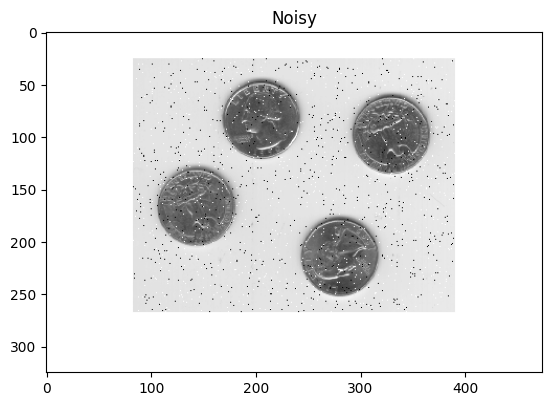

In [4]:
img_noise = cv2.imread("Coins.png")
utilities.display_image(img_noise, "Noisy")


### Apply filters to remove Noise

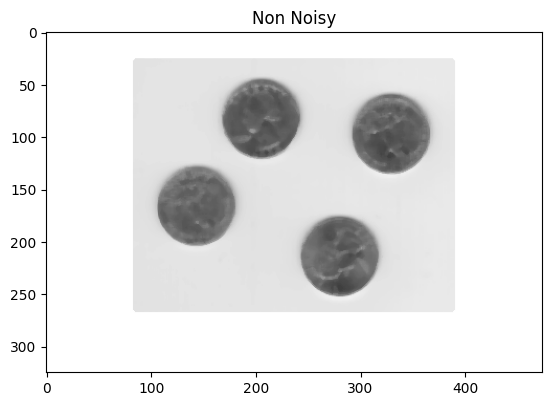

In [ ]:
img_noise.shape
noisy_gray = cv2.cvtColor(img_noise, cv2.COLOR_BGR2GRAY)
noisy_gray.shape
img_non = cv2.medianBlur(noisy_gray, 5)
utilities.display_image(img_non, "Non Noisy")




### Thresholding Image Using Otsu's method

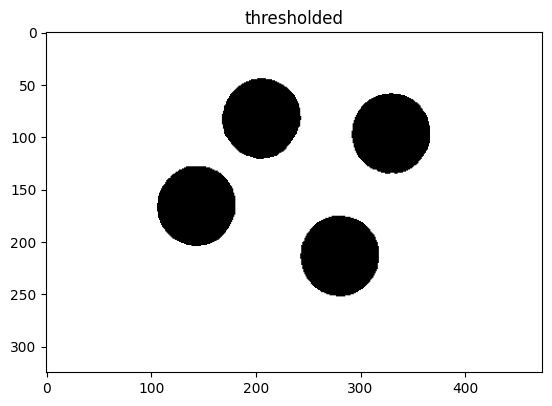

173.0

In [15]:
otsu_threshold, image_result = cv2.threshold(
    img_non, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)

utilities.display_image(image_result, "thresholded")
otsu_threshold

### Inverting Image

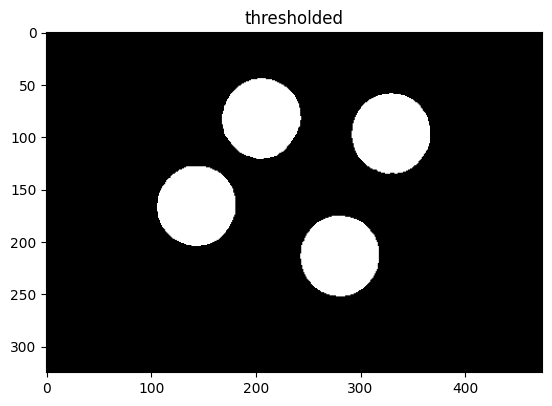

In [ ]:
invert = cv2.bitwise_not(image_result)
utilities.display_image(invert, "thresholded and inverted")


### Getting objects

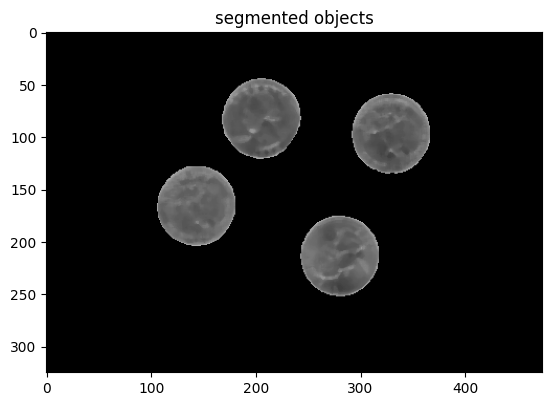

In [14]:
img1_bg = cv2.bitwise_and(img_non,img_non,mask = invert)
utilities.display_image(img1_bg, "segmented objects")

### Getting edges (using Sobel Operator)


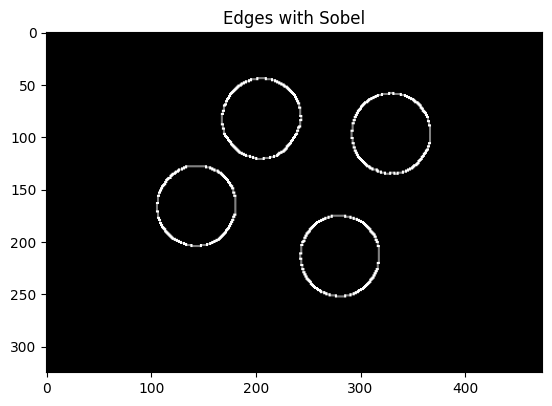

In [30]:
scale = 1
delta = 0
ddepth = cv2.CV_16S  ## To prevent overflow
kernel_size = 3

grad_x = cv2.Sobel(invert, ddepth, 1, 0, ksize=kernel_size, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(invert, ddepth, 0, 1, ksize=kernel_size, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0) ## approximating gradient
utilities.display_image(grad, "Edges with Sobel")






### Using Laplacian

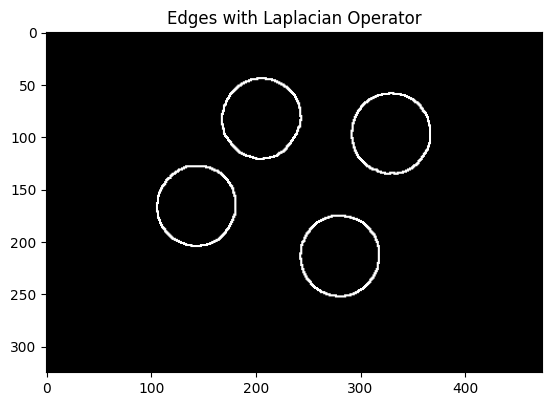

In [29]:
ddepth = cv2.CV_16S  ## To prevent overflow
kernel_size = 3

dst = cv2.Laplacian(invert, ddepth, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(dst)
utilities.display_image(abs_dst, "Edges with Laplacian Operator")

## Image Stitching

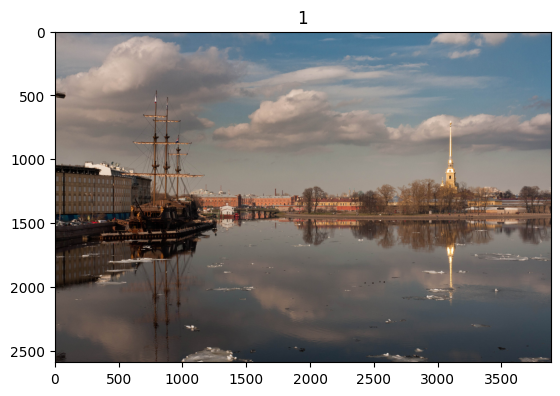

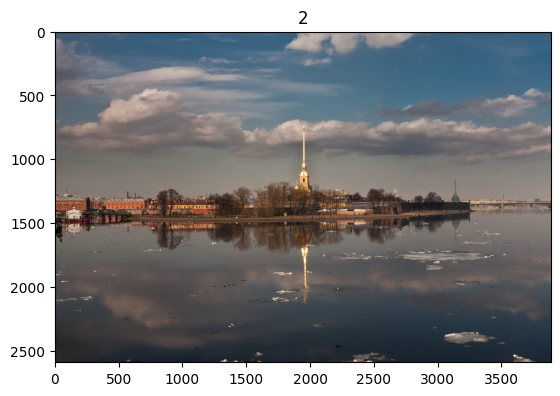

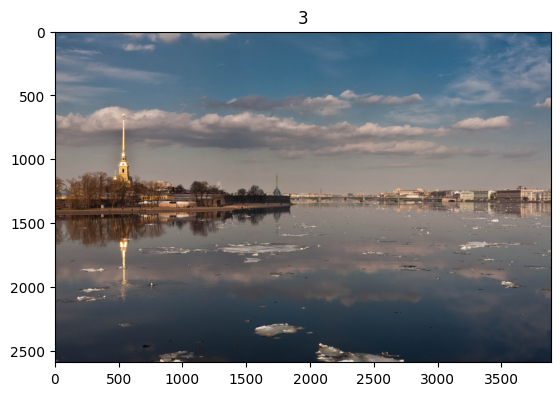

In [3]:
## getting images
imgs = []
for i in range(1,4):
    img_name = "boat" + str(i) + ".jpg"
    img= cv2.imread(img_name)
    utilities.display_image(img, str(i))
    imgs.append(img)
    

    

stitching completed successfully.


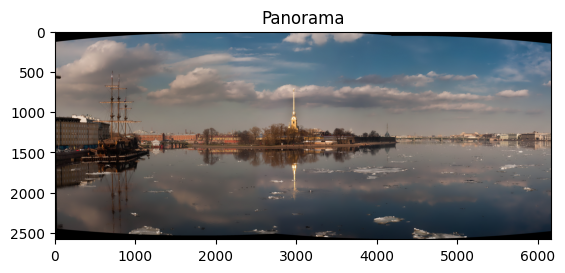

In [59]:


# sticther object  
stitcher = cv2.Stitcher.create()
status, panorama = stitcher.stitch(imgs)

if status != cv2.Stitcher_OK:
    print("Can't stitch images, error code = %d" % status)

cv2.imwrite("panorama_boat.jpg", panorama)
print("stitching completed successfully.")

utilities.display_image(panorama, "Panorama")



